In [1]:
import os
import shutil
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

In [2]:
# extract MFCC features from PNG images
def extract_mfcc_from_png(file_path):
    img = Image.open(file_path).convert('L')
    mfcc_array = np.array(img) / 255.0 
    mfcc_mean = np.mean(mfcc_array, axis=0) 
    return mfcc_mean

In [3]:
data_dir_train = "./dataset/train"
data_dir_val = "./dataset/val"
accents = ["england", "india", "usa"]

# Count number of data in train and validation sets
num_train_samples = sum([len(os.listdir(os.path.join(data_dir_train, accent))) for accent in accents])
num_val_samples = sum([len(os.listdir(os.path.join(data_dir_val, accent))) for accent in accents])
print(f"Number of training samples: {num_train_samples}")
print(f"Number of validation samples: {num_val_samples}")

Number of training samples: 1905
Number of validation samples: 479


Accuracy: 60.96%

Classification Report:

              precision    recall  f1-score   support

     england       0.48      0.33      0.39        88
       india       0.62      0.37      0.46       146
         usa       0.63      0.85      0.72       245

    accuracy                           0.61       479
   macro avg       0.58      0.52      0.53       479
weighted avg       0.60      0.61      0.58       479



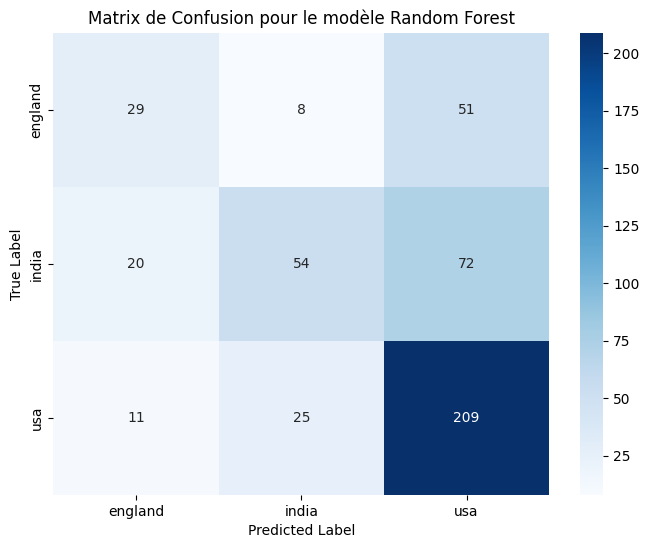

In [9]:
# Convert features and labels to numpy arrays
features = np.array(features)
labels = np.array(labels)

# Encode labels using LabelEncoder
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Split features and labels manually based on the number of samples in train/val sets
X_train = features[:num_train_samples]
y_train = labels_encoded[:num_train_samples]
X_test = features[num_train_samples:]
y_test = labels_encoded[num_train_samples:]

# Train the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Compute confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matrix de Confusion pour le modèle Random Forest')
plt.savefig("plot_random_forest.png", dpi=300, bbox_inches='tight')
plt.show()
